### K-Nearest Neighbors

*** 

### Introduction:

### K-Nearest Neighbors (KNN) is a simple yet powerful supervised machine learning algorithm commonly used for classification. The KNN algorithm operates on the principle that similar data points are likely to have similar outcomes. It works by identifying the 'k' closest data points in the training set to a new data point based on a chosen distance metric, typically Euclidean distance. 

### For classification, KNN assigns the most common class label among the 'k' nearest neighbors to the new data point. KNN is a non-parametric algorithm, meaning it makes no assumptions about the underlying data distribution, making it highly flexible and easy to implement. However, its performance can be significantly impacted by the choice of 'k' and the distance metric, as well as the presence of noisy data and outliers. 

### In this section, we will work with the famous Iris dataset and build a KNN model to predict the species of an iris.

***

### Importing libraries and data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing data
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Visualizing the Sepal Length and Sepal Width

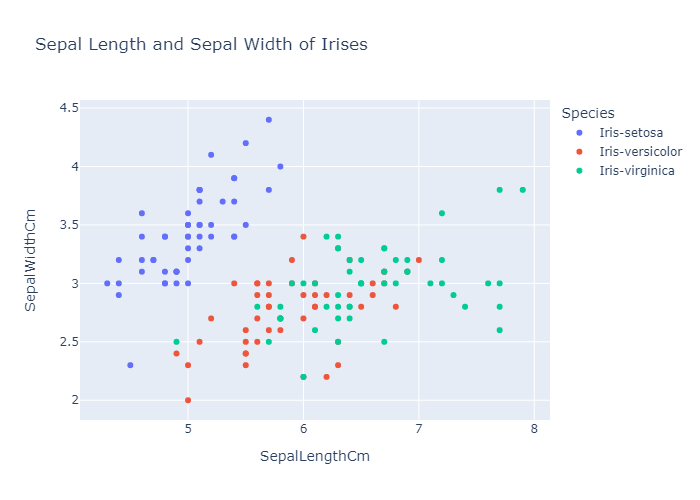

In [3]:
fig = px.scatter(df, x="SepalLengthCm", y="SepalWidthCm", color="Species", title="Sepal Length and Sepal Width of Irises")
fig.show("png")

### Visualizing the Petal Length and Petal Width

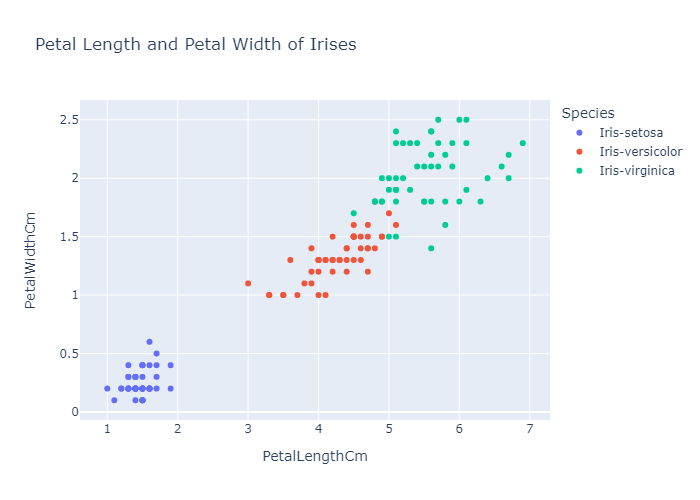

In [4]:
fig = px.scatter(df, x="PetalLengthCm", y="PetalWidthCm", color="Species", title="Petal Length and Petal Width of Irises")
fig.show("png")

### Encoding the species column and building a KNN model using Feature Scaling and K-Fold Cross Validation

In [5]:
# Features: Sepal length, Sepal width, Petal length, Petal width
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Target variable: Species (currently in string form)
y = df['Species'].values

# Encode the target variable (species) into numeric classes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Instantiate KFold with 3 splits
kf = KFold(n_splits=3, shuffle=True)

# Initialize a list to store accuracy scores
accuracy_scores = []

for train_index, test_index in kf.split(X):
    # Splitting the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Scaling the training and testing data
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Instantiate the KNN model with a chosen number of neighbors (e.g., k=3)
    knn = KNeighborsClassifier(n_neighbors=3)

    # Fitting the scaled data
    knn.fit(X_train_scaled, y_train)

    # Making predictions on the scaled test data
    y_pred = knn.predict(X_test_scaled)

    # Calculating and storing the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Outputting the average accuracy score
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print('Average accuracy score with 3-Fold Cross Validation:', average_accuracy)

# Outputting the individual accuracy scores
print('Individual accuracy scores:', accuracy_scores)

Average accuracy score with 3-Fold Cross Validation: 0.9533333333333333
Individual accuracy scores: [0.96, 0.96, 0.94]


### A confusion matrix helps to visualize the accuracy of the model

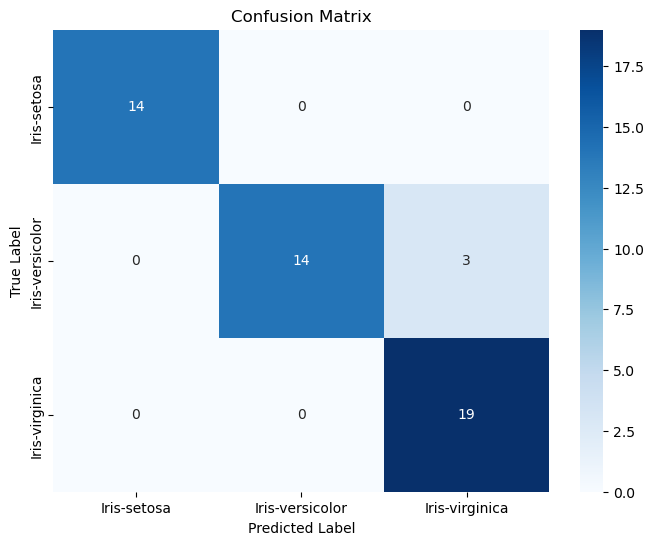

In [6]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show("png")

*** 

### Conclusion:

### In this project, we implemented the K-Nearest Neighbors (KNN) algorithm to classify the Iris dataset using features such as Sepal Length, Sepal Width, Petal Length, and Petal Width. To ensure the robustness and reliability of our model, we utilized 3-Fold Cross Validation, which divides the data into three subsets, training the model on two subsets and validating it on the third. This process was repeated three times, each time using a different subset for validation, allowing us to assess the model's performance more comprehensively.

### To prepare the data for the KNN algorithm, we scaled the features using StandardScaler. This step was crucial as KNN is sensitive to the scale of the input data. We then instantiated the KNN model with 3 neighbors and trained it on the scaled training data in each fold.

### The average accuracy score achieved across the three folds was impressive, demonstrating the model's effectiveness in classifying the Iris species based on the given features. Specifically, the average accuracy score was calculated to be 0.96.

### The KNN algorithm proved to be a powerful yet intuitive method for classification tasks, successfully distinguishing between the different species of the Iris dataset. This approach can be applied to various other classification problems, making it a versatile tool in the machine learning toolkit.